In [11]:
def func2(p1=0,p2=0,p3=0):
    print("func2")
    print(f"p1 {p1}")
    print(f"p2 {p2}")
    print(f"p3 {p3}")
def func(val,*args,**kwargs):
    print("func")
    print(f"val {val}")
    print(f"kwargs {kwargs}")
    func2(val,*args,**kwargs)
func(56,78,p3=45)

func
val 56
kwargs {'p3': 45}
func2
p1 56
p2 78
p3 45


In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy
import xarray as xr
from Autocorrelation import autocorr,autocorr_lisse
from reg_lin import reg_log
path =os.getcwd()
print(path)
ds = xr.open_dataset(path+r'/'+"Qg_245_SLPM_Ql_99_mLPM_fps_11000_Hz_unitLb_mm.nc.nc4")
L_b=ds['Lb'][:]
print(L_b)
%matplotlib inline

C:\Users\evanl\Documents\TP_Spray
<xarray.DataArray 'Lb' (y: 15563, x: 1)>
[15563 values with dtype=float64]
Dimensions without coordinates: y, x


[0.95192308 1.02944712 1.10697115 ... 1.05108173 0.93209135 1.02223558]
[0]
[    0     1     2 ... 15560 15561 15562]


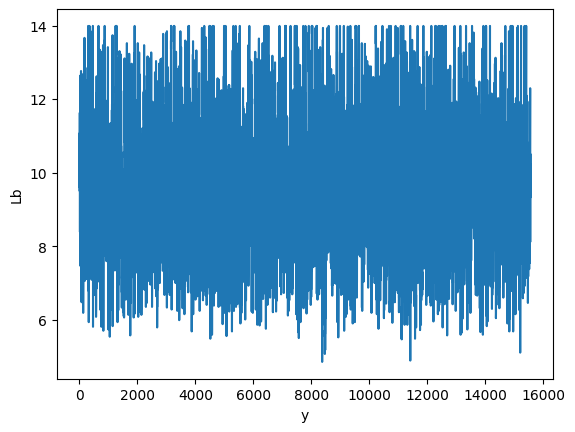

In [2]:
L_b.isel(x=0).plot()
dg=10.0#mm
Lb=L_b.isel(x=0).values/dg#normalise
print(Lb)
print(L_b.coords["x"].values)
print(L_b.coords["y"].values)

0.9376548838097262
-2.6366280916369456e-17


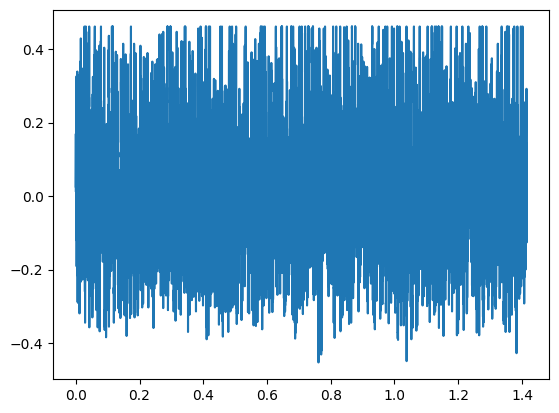

In [3]:
Lb_moy=Lb.mean()
Lb_f=Lb-Lb_moy
print(Lb_moy)
print(Lb_f.mean())
fps=11000.0#kHz, frequence d'echantillonage
N_ech=L_b.coords["y"].values.size
dt=1.0/fps
t=np.linspace(0.0,N_ech*dt,N_ech)
plt.plot(t,Lb_f)

Calcul de la distribution de probabilité de largeur du jet

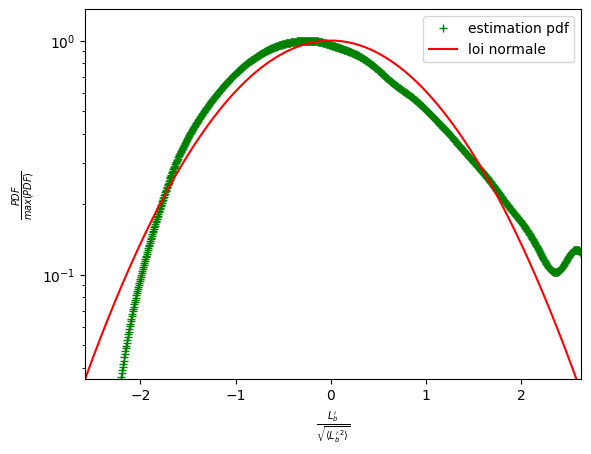

In [4]:
Lb_std=np.std(Lb)
N_bins=160
Lb_f_norm=Lb_f/Lb_std
#Lb_pdf,bins=np.histogram(Lb_f/Lb_std,bins=N_bins,density=True)
"""a=np.linspace(-10,10,100)
plt.plot(a,gaussienne(a,1.0))
print(Lb_f)"""
Lb_norm_pts=np.linspace(np.min(Lb_f_norm),np.max(Lb_f_norm),1000)
estimateur=scipy.stats.gaussian_kde(Lb_f_norm)
Lb_pdf=estimateur.pdf(Lb_norm_pts)
Lb_pdf_norm=Lb_pdf/np.max(Lb_pdf)

gaussienne=scipy.stats.norm.pdf(Lb_norm_pts)
gaussienne_norm=gaussienne/np.max(gaussienne)
fig=plt.figure()
plt.plot(Lb_norm_pts,Lb_pdf_norm,'g+', label='estimation pdf')
plt.plot(Lb_norm_pts,gaussienne_norm,'r',label='loi normale')
plt.xlabel(r"$\frac{L_{b}'}{\sqrt{\langle L_{b}'^2 \rangle}}$")
plt.ylabel(r"$\frac{PDF}{max(PDF)}$")
plt.yscale("log")
plt.xlim(Lb_norm_pts[0],Lb_norm_pts[-1])
plt.ylim(bottom=gaussienne_norm[0])
plt.legend()
#plt.savefig("Spray_PDF.png")

Calcul de la densité spectrale de puissance

fit loi de puissance :  exposant = -1.3512149655697419


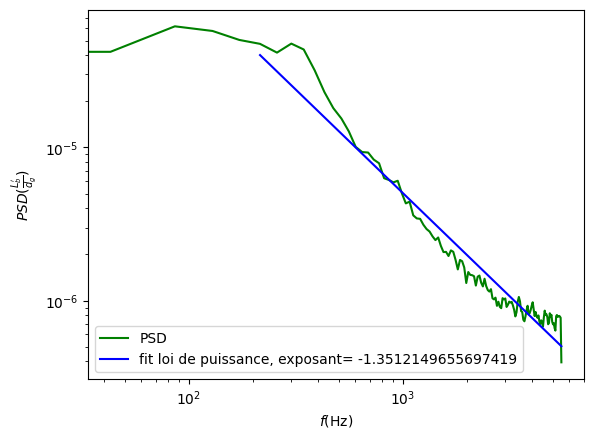

In [5]:
freq,PSD=scipy.signal.welch(Lb_f,fps)
freq_inf=199#Hz
arg_fit=np.argmin(np.abs(freq-freq_inf))
freq_fit=freq[arg_fit:]
PSD_fit=PSD[arg_fit:]
r=reg_log(freq_fit,PSD_fit)
print("fit loi de puissance :  exposant = "+str(r[0]))
fig=plt.figure()
plt.plot(freq,PSD,'g', label="PSD")
plt.plot(freq_fit,np.exp(r[1])*freq_fit**(r[0]),'b',label='fit loi de puissance, exposant= '+str(r[0]))
plt.xlabel(r'$f$(Hz)')
plt.ylabel(r"$PSD(\frac{L_{b}'}{d_g})$")
plt.yscale('log')
plt.legend()
plt.xscale('log')
#plt.savefig("Spray_PSD.png")

Calcul de l'autocorrélation

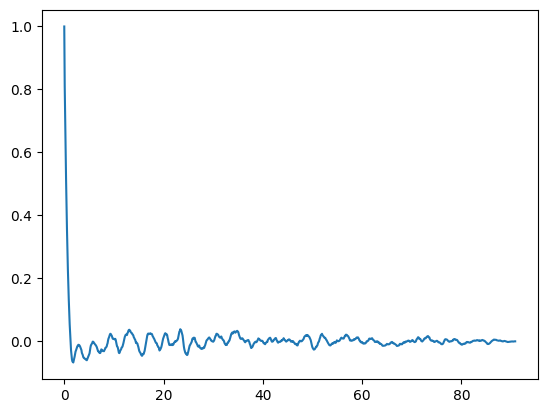

In [6]:
N_tau=1000
#tau=np.linspace(0.0,N_tau*dt,N_tau)
tau,autocorr_Lb=autocorr_lisse(Lb,N_tau)
tau_ms=tau*dt*1000.0
C_Lb=autocorr_Lb/np.max(autocorr_Lb)
plt.plot(tau_ms,C_Lb)


Bon, on trace que la PSD et la PDF. On met tout dans une seule figure.

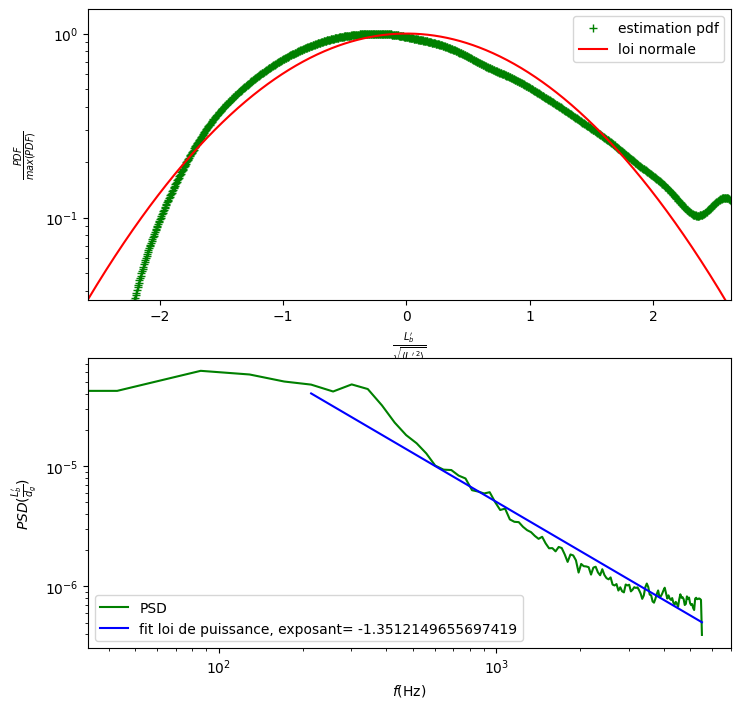

In [10]:
fig=plt.figure(figsize=(8.3,8.3))
plt.subplot(2,1,1)
plt.plot(Lb_norm_pts,Lb_pdf_norm,'g+', label='estimation pdf')
plt.plot(Lb_norm_pts,gaussienne_norm,'r',label='loi normale')
plt.xlabel(r"$\frac{L_{b}'}{\sqrt{\langle L_{b}'^2 \rangle}}$")
plt.ylabel(r"$\frac{PDF}{max(PDF)}$")
plt.yscale("log")
plt.xlim(Lb_norm_pts[0],Lb_norm_pts[-1])
plt.ylim(bottom=gaussienne_norm[0])
plt.legend()
plt.subplot(2,1,2)
plt.plot(freq,PSD,'g', label="PSD")
plt.plot(freq_fit,np.exp(r[1])*freq_fit**(r[0]),'b',label='fit loi de puissance, exposant= '+str(r[0]))
plt.xlabel(r'$f$(Hz)')
plt.ylabel(r"$PSD(\frac{L_{b}'}{d_g})$")
plt.yscale('log')
plt.legend()
plt.xscale('log')
plt.savefig("TP_Spray_Res.png")